Dataset Description -
Datasets with text fragments from astrophysics papers, provided by the NASA Astrophysical Data System with manually tagged astronomical facilities and other entities of interest (e.g., celestial objects).
Datasets are in JSON Lines format (each line is a json dictionary).
The datasets are formatted similarly to the CONLL2003 format. Each token is associated with an NER tag. The tags follow the "B-" and "I-" convention from the IOB2 syntax

Each entry consists of a dictionary with the following keys:

"unique_id": a unique identifier for this data sample. Must be included in the predictions.
"tokens": the list of tokens (strings) that form the text of this sample. Must be included in the predictions.
"ner_tags": the list of NER tags (in IOB2 format)
The following keys are not strictly needed by the participants:

"ner_ids": the pre-computed list of ids corresponding ner_tags, as given by the dictionary in ner_tags.json
"label_studio_id", "section", "bibcode": references for internal NASA/ADS use.

Source - https://huggingface.co/datasets/fgrezes/WIESP2022-NER#dataset-description

In [60]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

# credits -> https://stackoverflow.com/posts/17303428/revisions
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
df = pd.read_parquet('https://github.com/BhardwajAnshul/NER-Project/blob/main/data/WIESP2022-NER-TRAINING.parquet?raw=true')

In [3]:
df

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S
...,...,...,...,...,...,...,...
573127,2016A&A...591A..74D,1746,62,O,fulltext,level,fulltext_1746_2016A&A...591A..74D
573128,2016A&A...591A..74D,1746,62,O,fulltext,(RV,fulltext_1746_2016A&A...591A..74D
573129,2016A&A...591A..74D,1746,62,O,fulltext,intervals,fulltext_1746_2016A&A...591A..74D
573130,2016A&A...591A..74D,1746,62,O,fulltext,48,fulltext_1746_2016A&A...591A..74D


In [33]:
print(f"{'Column Name':<20} {'Number of Unique Values'}")
for col in df.columns:
    print(f'{col:<20} {df[col].nunique()}')

Column Name          Number of Unique Values
bibcode              1723
label_studio_id      1332
ner_ids              63
ner_tags             63
section              2
tokens               48991
unique_id            1753


In [29]:
# Unique entries in ner_ids
pprint(df.ner_ids.unique())

array([62, 15, 17,  4, 35, 27, 30, 61, 18, 49, 24, 55, 12, 43, 22, 21, 52,
       11, 42, 13, 44, 53, 16, 47, 10, 41, 29,  5, 36,  1, 32,  8, 39,  2,
       33, 28, 59, 25, 19, 50,  6, 37, 56, 58, 20,  3, 34,  0, 31, 23, 51,
        7, 38, 26, 14, 45, 48, 60, 57, 54, 46,  9, 40])


In [30]:
# Unique entries in ner_tags
pprint(df.ner_tags.unique())

array(['O', 'B-Instrument', 'B-Mission', 'B-Citation', 'I-Citation',
       'B-Telescope', 'B-Wavelength', 'I-Wavelength', 'B-Model',
       'I-Model', 'B-Software', 'I-Software', 'B-Formula', 'I-Formula',
       'B-Person', 'B-Organization', 'I-Organization', 'B-Fellowship',
       'I-Fellowship', 'B-Grant', 'I-Grant', 'I-Person', 'B-Location',
       'I-Location', 'B-Event', 'I-Event', 'B-URL', 'B-Collaboration',
       'I-Collaboration', 'B-CelestialObject', 'I-CelestialObject',
       'B-Dataset', 'I-Dataset', 'B-CelestialObjectRegion',
       'I-CelestialObjectRegion', 'B-TextGarbage', 'I-TextGarbage',
       'B-Survey', 'B-ObservationalTechniques',
       'I-ObservationalTechniques', 'B-ComputingFacility',
       'I-ComputingFacility', 'I-Survey', 'I-Telescope', 'B-Observatory',
       'B-CelestialRegion', 'I-CelestialRegion', 'B-Archive', 'I-Archive',
       'B-Proposal', 'I-Observatory', 'B-Database', 'I-Database', 'B-Tag',
       'B-Identifier', 'I-Identifier', 'I-Mission', 'I

In [70]:
ner_count_df = df['ner_tags'].value_counts().reset_index()
ner_count_df.head(20)

,index,ner_tags
0,O,472307
1,I-Citation,18402
2,I-Organization,14211
3,I-Formula,8433
4,B-Organization,7448
...,...,...
15,I-Wavelength,1583
16,B-Telescope,1573
17,B-Location,1404
18,I-Model,1244


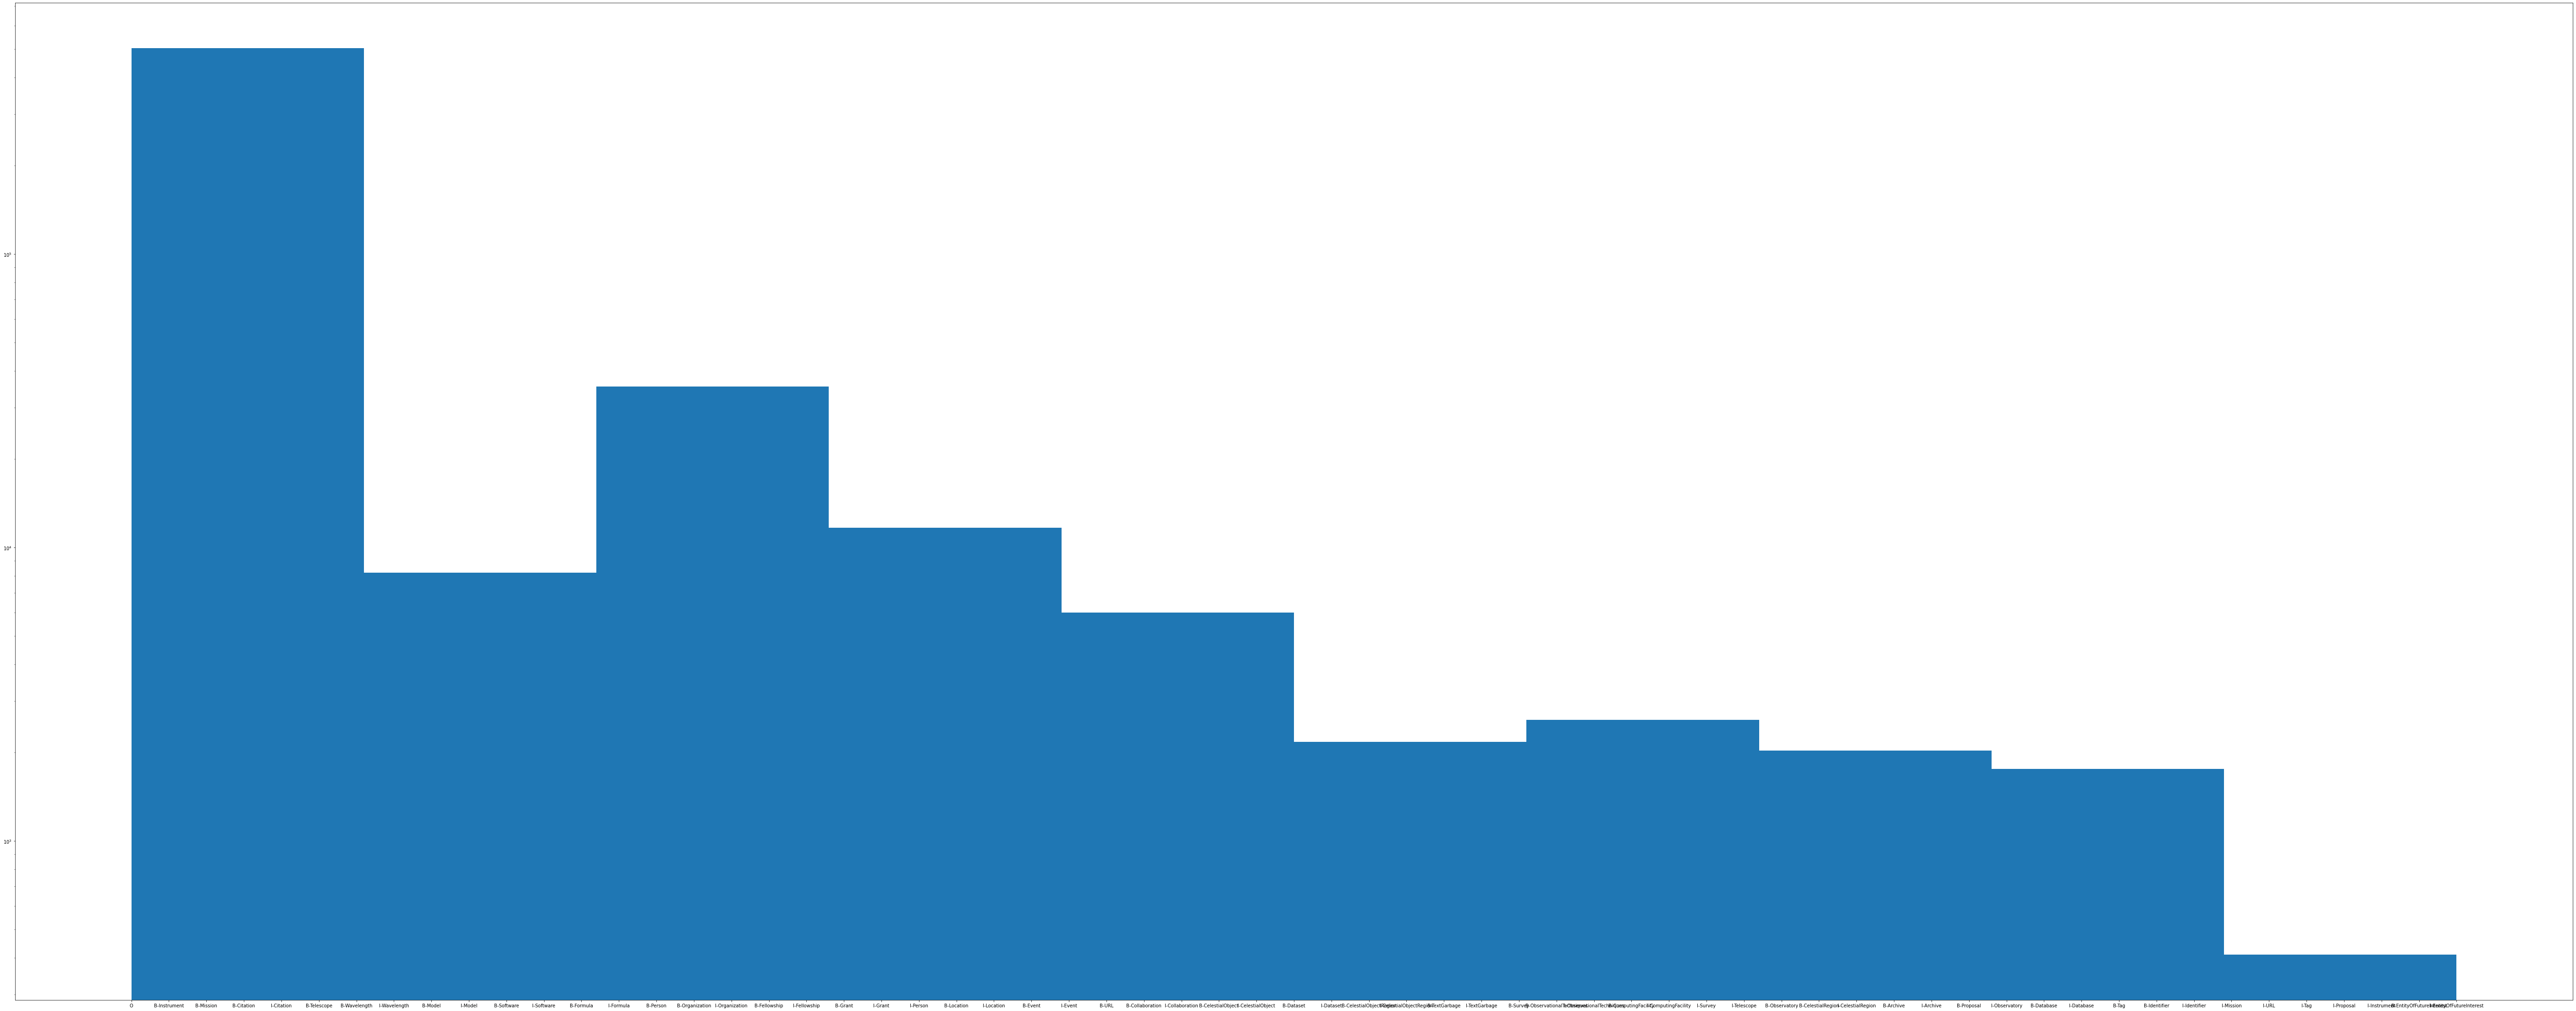

In [73]:
# Explore the tags

plt.figure(figsize=(100,40))
plt.hist(df.ner_tags, log=True)
plt.show()

In [35]:
# Unique entries in section
pprint(df.section.unique())

array(['fulltext', 'acknowledgments'], dtype=object)


In [40]:
len(df.groupby(['ner_tags', 'section']))

115

In [48]:
set(df.query("section=='fulltext'").ner_tags.unique()) - set(df.query("section!='fulltext'").ner_tags.unique())

{'B-CelestialObjectRegion',
 'B-EntityOfFutureInterest',
 'B-Formula',
 'B-Tag',
 'I-CelestialObjectRegion',
 'I-EntityOfFutureInterest',
 'I-Formula',
 'I-ObservationalTechniques',
 'I-Tag'}

In [49]:
set(df.query("section!='fulltext'").ner_tags.unique()) - set(df.query("section=='fulltext'").ner_tags.unique())

{'B-Fellowship', 'I-Fellowship'}

In [54]:
df.groupby('unique_id').agg(word_count = ('unique_id', 'count')).sort_values('word_count')

,word_count
unique_id,
acknowledgments_1412_2017A&A...608A..57V,7
acknowledgments_1102_2015MNRAS.446.1347M,8
acknowledgments_1225_2018MNRAS.478L..95K,11
acknowledgments_1025_2016MNRAS.456.1955D,12
acknowledgments_1039_2016MNRAS.457.4330Y,13
...,...
acknowledgments_717_2016ApJ...826..144S,660
acknowledgments_96_2018ApJ...859..101S,666
acknowledgments_611_2018A&A...616A..69B,677


In [55]:
df.groupby('unique_id').agg(word_count = ('unique_id', 'count')).sort_values('word_count').head(20)

,word_count
unique_id,
acknowledgments_1412_2017A&A...608A..57V,7
acknowledgments_1102_2015MNRAS.446.1347M,8
acknowledgments_1225_2018MNRAS.478L..95K,11
acknowledgments_1025_2016MNRAS.456.1955D,12
acknowledgments_1039_2016MNRAS.457.4330Y,13
...,...
acknowledgments_1018_2018MNRAS.478..342B,19
acknowledgments_988_2016MNRAS.461.3948P,19
acknowledgments_492_2015ApJ...802...16Y,19
